<a href="https://colab.research.google.com/github/cras-lab/Finance/blob/main/Correalation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FinanceDataReader를 사용해 상관분석을 시작해 본다.

먼저 finance-reader를 설치한다.

In [24]:
pip install -q finance-datareader

필요한 모듈을 임포트 한다.

In [25]:
import numpy as np
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

읽어들일 기간을 설정한다.

In [26]:
start_date ='2022-01-01'
end_date = '2022-12-31'

값을 읽어올 종목의 이름과 심볼 기호를 설정한다.

In [27]:
tickers = ['005930', '066570', '003490', '010950', '051910', '330590', '000100', '000087', '000070', '000150', '000270' , '057050' ]
names = ['Samsung', 'LGE', 'KAL', 'G-Cross', 'S-Oil', 'LG-Chem', 'Yoohan', 'HITE', 'Meritz', 'Doosan' , "KIA", "HD-HS"]

월별 수익률을 기록할 데이터프레임을 선언한다.

In [28]:
m_ret = pd.DataFrame()

루프를 돌며, <BR>
1) 실제 데이터를 읽어오고 <BR>
2) 이를 월별로 재표본한다음, 수익률을 구한다.

In [29]:
for ticker in tickers:
  m_ret[ ticker ] = fdr.DataReader( ticker, start_date, end_date ).Close.resample('M').apply( lambda x: (x[-1]-x[0])/ x[0])

가독성을 위해 티커심볼 대신, 회사 이름을 설정한다.

In [30]:
m_ret.columns = names

 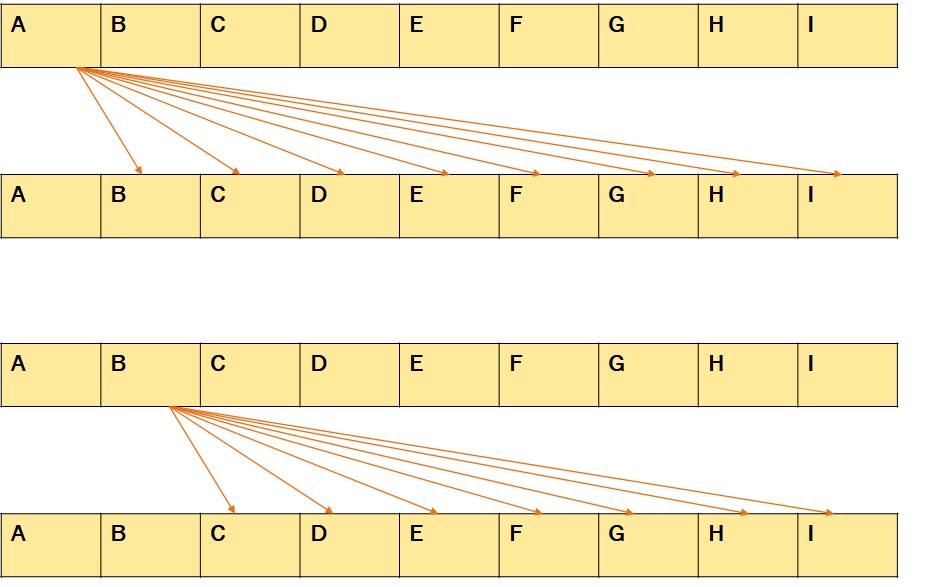

최대 최소 값을 찾기 위해 상관관계 지수 값을 초기화 한다.

In [31]:
max_corr = -1
min_corr = 1

루프를 돌며, 각 쌍에 대해 피어슨 상관지수를 구한 다음, 최대 최소를 갱신한다.

In [32]:
for i in range(len(tickers)):
  for j in range( i+1, len(tickers)):
    corr = np.corrcoef( m_ret[names[i]], m_ret[names[j]])[0][1]
    if( max_corr < corr ):  # 최대값 갱신
      max_corr = corr
      max_index = [i, j]
    if( min_corr > corr ):  # 최소값 갱신
      min_corr = corr
      min_index = [i,j]

최대값과 최소값을 출력해 본다.

In [ ]:
print(f"closest pair= {names[max_index[0]]} and {names[max_index[1]]} P.Corr={max_corr}")
print(f"farthest pair= {names[min_index[0]]} and {names[min_index[1]]} P.Corr={min_corr}")

최대 최소 값의 움직임을 도식화 해 본다.

In [ ]:
plt.subplot(2,1,1)
plt.plot( m_ret[names[max_index[0]]], label= names[max_index[0]] )
plt.plot(m_ret[names[max_index[1]]] , label= names[max_index[1]] )
plt.legend( loc="upper left")

plt.subplot(2,1,2)
plt.plot( m_ret[names[min_index[0]]] , label= names[min_index[0]])
plt.plot( m_ret[names[min_index[1]]] , label= names[min_index[1]])
plt.legend( loc="lower left")